In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import dynamo as dyn
dyn.__version__

'0.0+c819ab2.dirty'

In [2]:
# simulate ggplot2 plotting styple with black background

dyn.configuration.set_figure_params('dynamo', background='black')  

In [3]:
import scvelo as scv 
adata = dyn.sample_data.DentateGyrus_scvelo()
adata

AnnData object with n_obs × n_vars = 2930 × 13913 
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

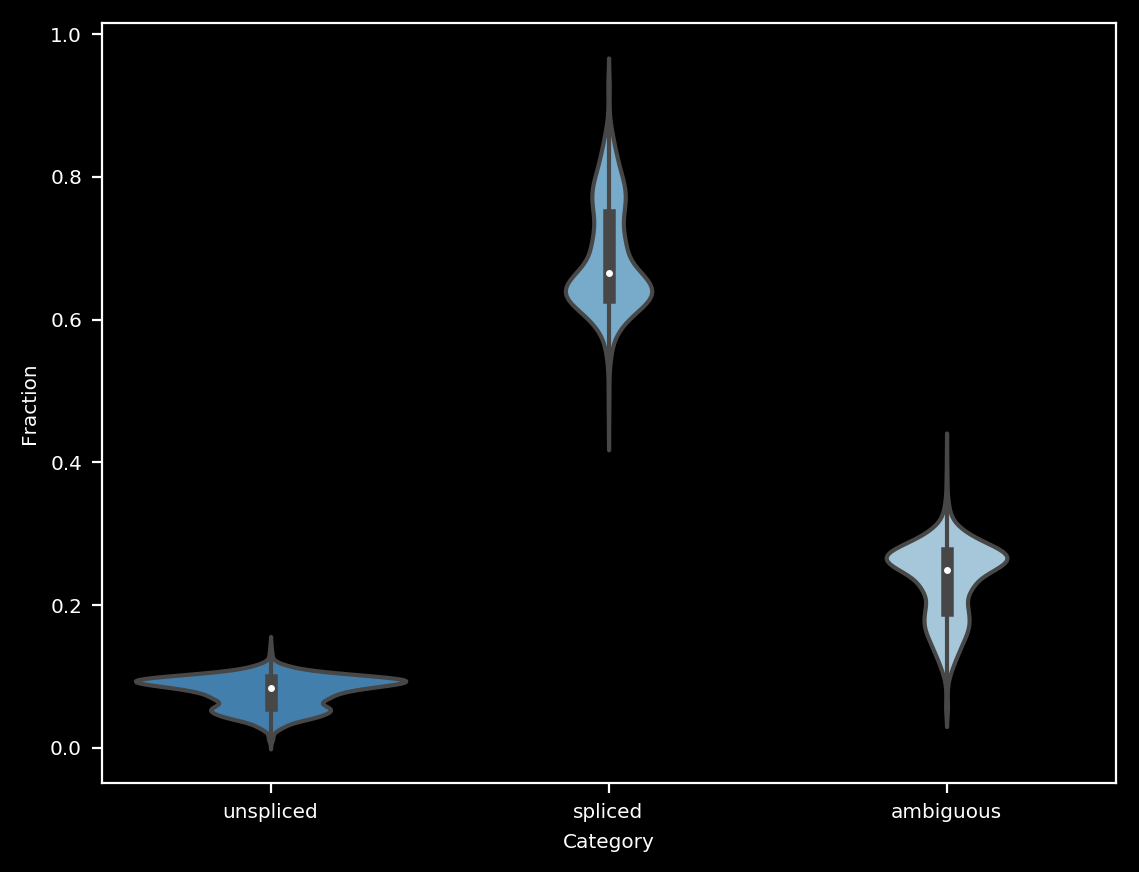

In [4]:
dyn.pl.show_fraction(adata)


In [5]:
dyn.pp.recipe_monocle(adata, n_top_genes=2000, fg_kwargs={'shared_count': 30})


AnnData object with n_obs × n_vars = 2930 × 13913 
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'unspliced_Size_Factor', 'spliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo'
    uns: 'clusters_colors', 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_umap', 'X_pca'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced'

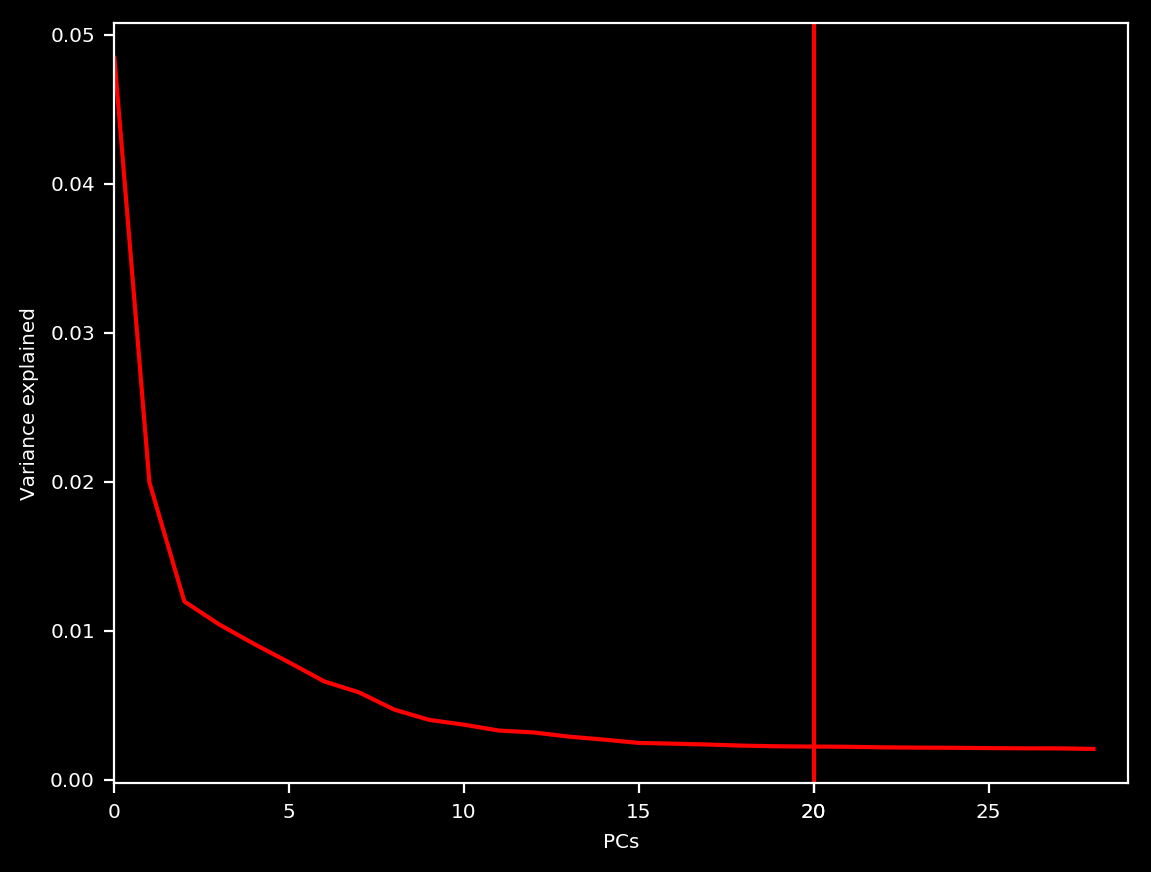

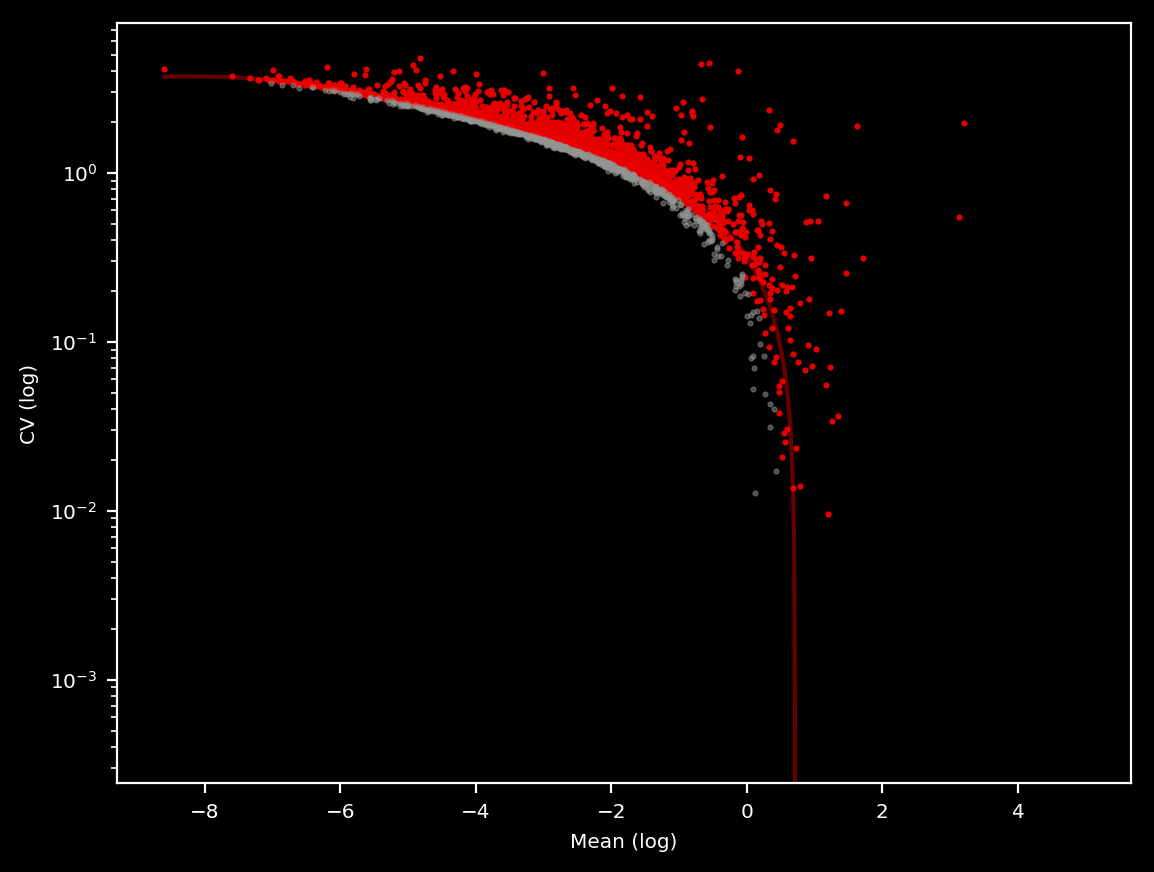

In [6]:
dyn.pl.variance_explained(adata)
dyn.pl.feature_genes(adata)

In [7]:
dyn.tl.dynamics(adata, mode='moment')


AnnData object with n_obs × n_vars = 2930 × 13913 
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'unspliced_Size_Factor', 'spliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0'
    uns: 'clusters_colors', 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_umap', 'X_pca'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

In [8]:
dyn.tl.reduceDimension(adata)


AnnData object with n_obs × n_vars = 2930 × 13913 
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'unspliced_Size_Factor', 'spliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0'
    uns: 'clusters_colors', 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors'
    obsm: 'X_umap', 'X_pca'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

In [9]:
dyn.tl.cell_velocities(adata)


AnnData object with n_obs × n_vars = 2930 × 13913 
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'unspliced_Size_Factor', 'spliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_velocity'
    uns: 'clusters_colors', 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'kmc', 'transition_matrix', 'grid_velocity_umap'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

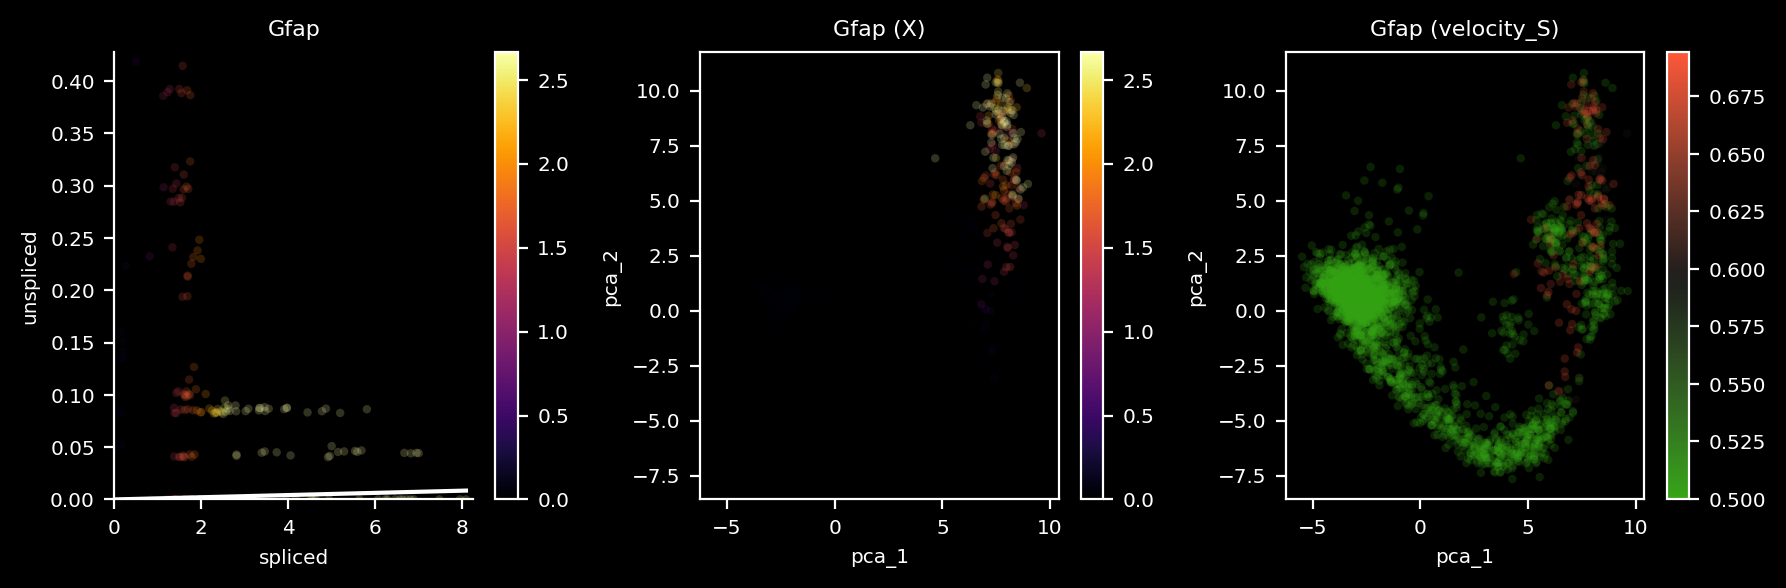

In [10]:
DentateGyrus_genes = ["Tnc", "Gfap", "Tac2", "Pdgfra", "Igfbpl1", 'Ptprn', "Sema3c", "Neurod6", "Stmn2", "Sema5a", "C1ql3", "Cpne4", "Cck"]

dyn.pl.phase_portraits(adata, genes=DentateGyrus_genes[:3], ncols=3, figsize=(3, 3), basis='pca', show_quiver=False)

<Figure size 650x500 with 0 Axes>

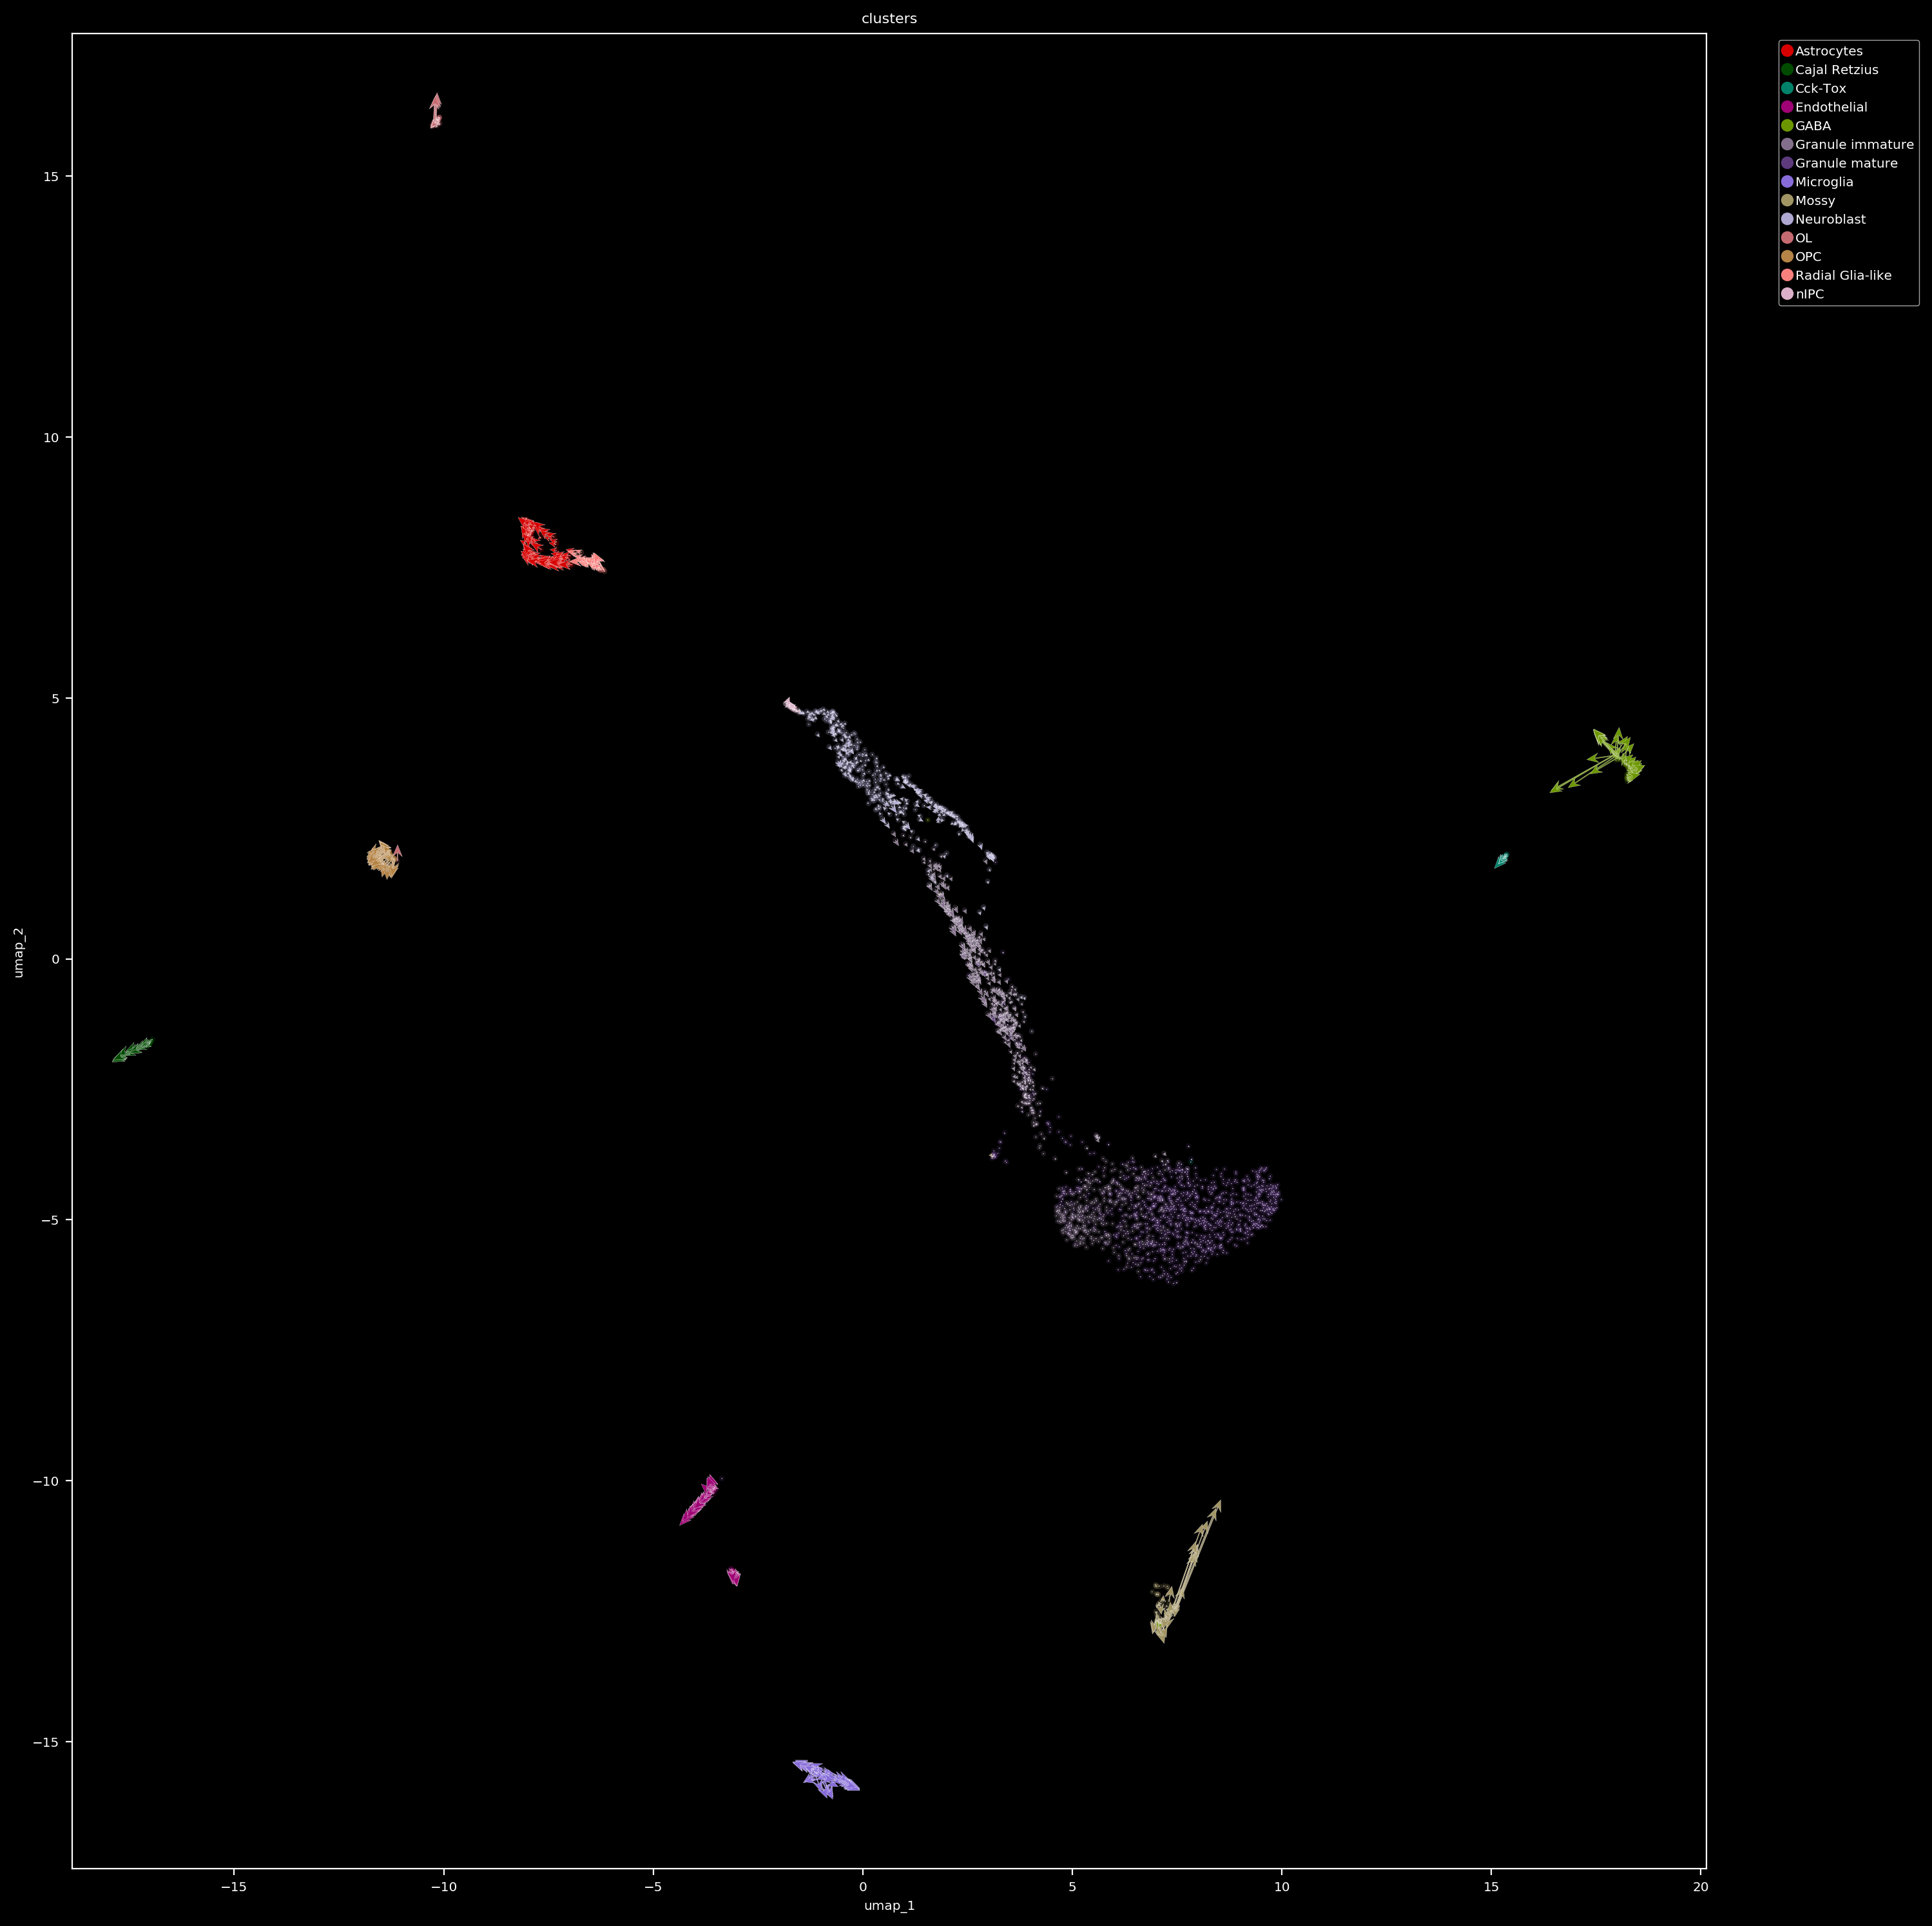

In [11]:
dyn.pl.cell_wise_velocity(adata, color=['clusters'], quiver_size=1.2, quiver_length=1.2, figsize=(15, 15)) # ['GRIA3', 'LINC00982', 'AFF2']



<Figure size 650x500 with 0 Axes>

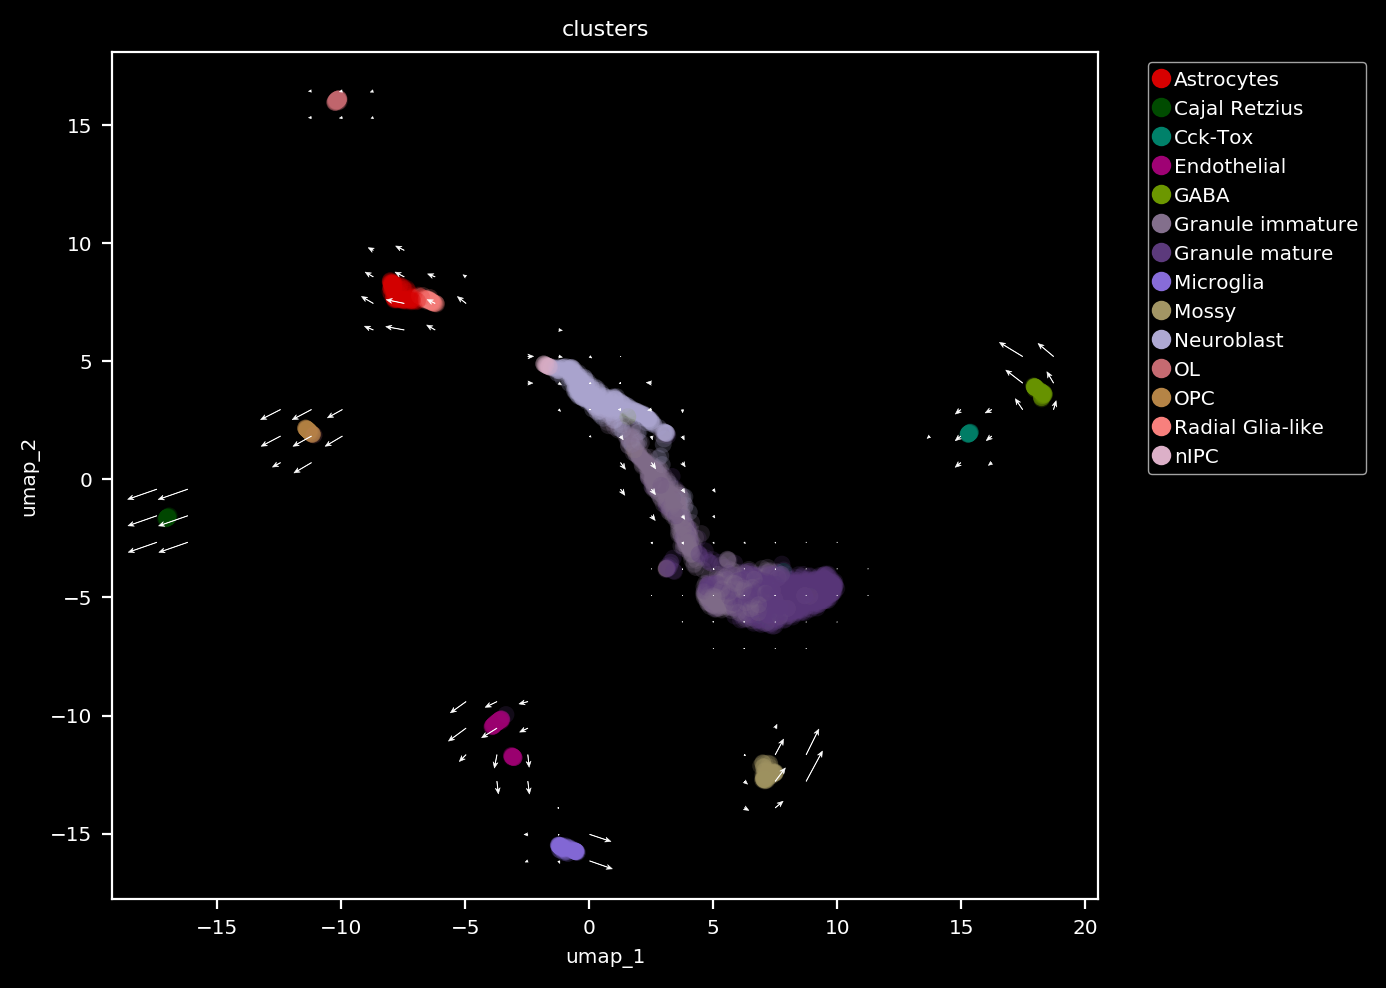

In [12]:
dyn.pl.grid_velocity(adata, color=['clusters'], method='gaussian')

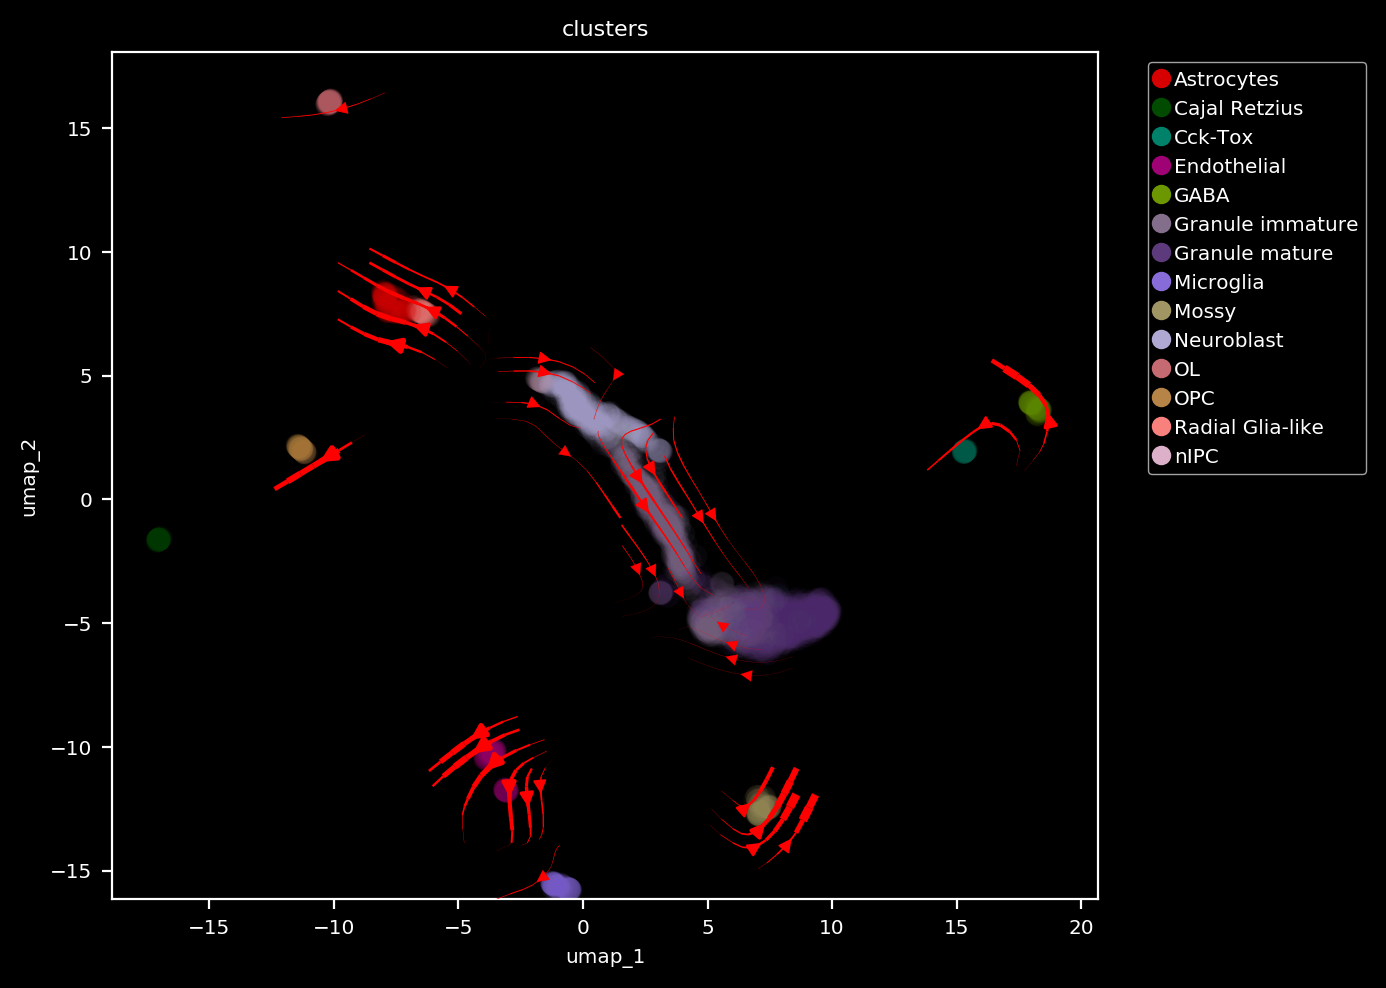

In [13]:

dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', density=2, background='black',s_kwargs_dict={"alpha": 0.05}) 

In [14]:
dyn.tl.VectorField(adata, basis='umap', dims=[0, 1])


AnnData object with n_obs × n_vars = 2930 × 13913 
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'unspliced_Size_Factor', 'spliced_Size_Factor', 'Size_Factor', 'use_for_dynamo'
    var: 'pass_basic_filter', 'log_m', 'log_cv', 'score', 'use_for_dynamo', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_velocity'
    uns: 'clusters_colors', 'velocyto_SVR', 'pp_log', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'kmc', 'transition_matrix', 'grid_velocity_umap', 'VecFld_umap'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'

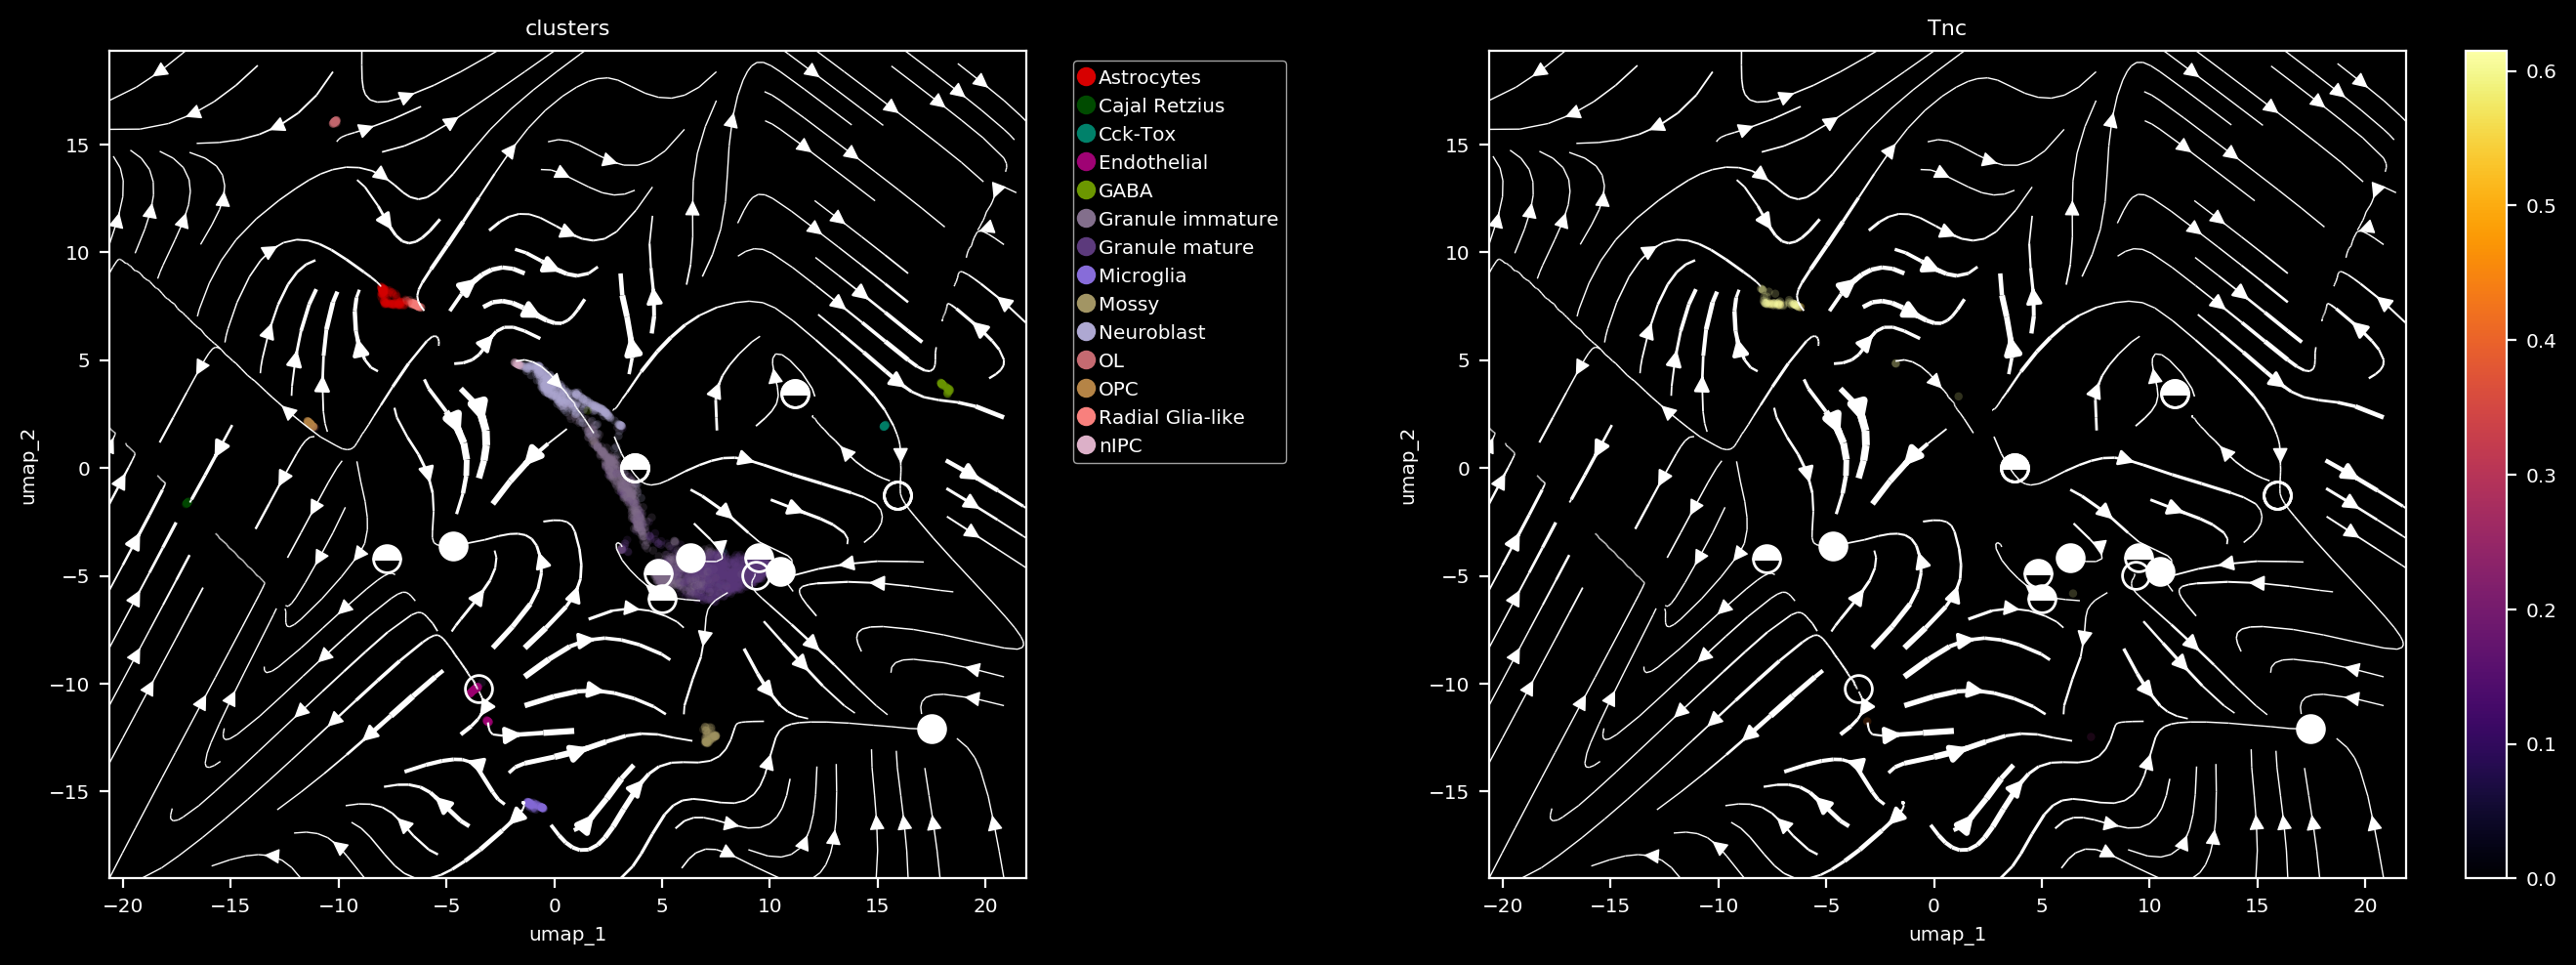

In [15]:
dyn.pl.topography(adata, color=['clusters', 'Tnc'], basis='umap', ncols=2)

In [16]:
dyn.configuration.set_figure_params('dynamo', background='white')  

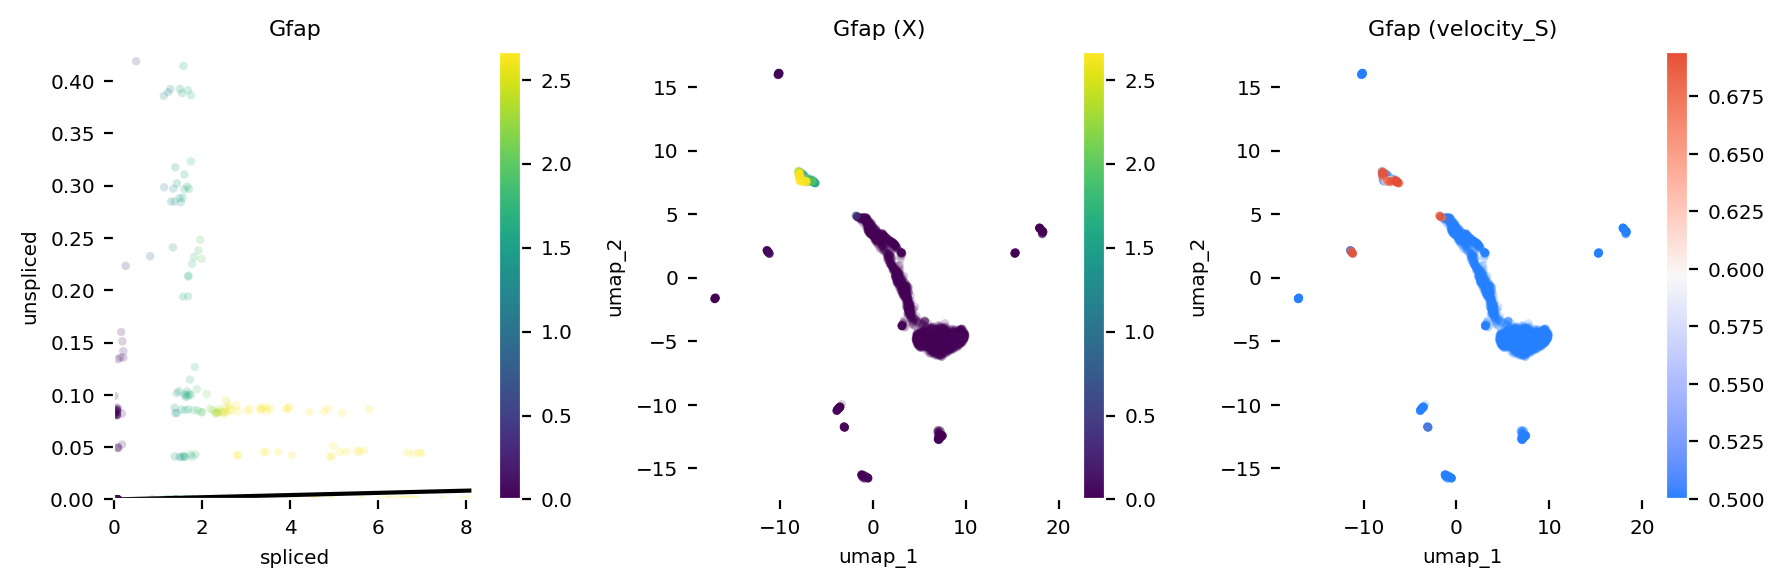

<Figure size 650x500 with 0 Axes>

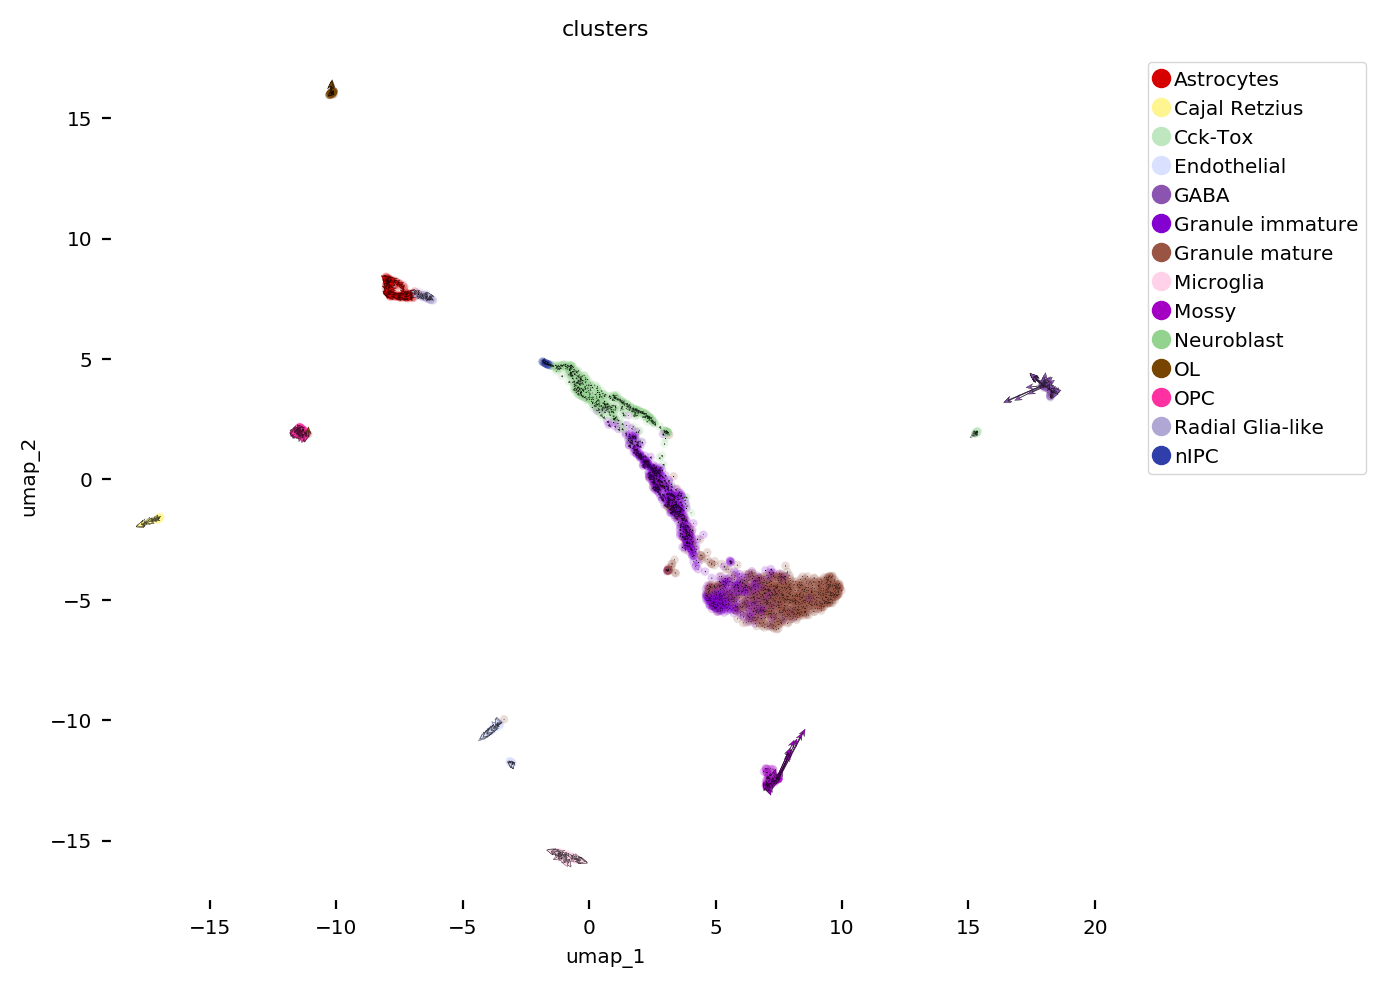

<Figure size 650x500 with 0 Axes>

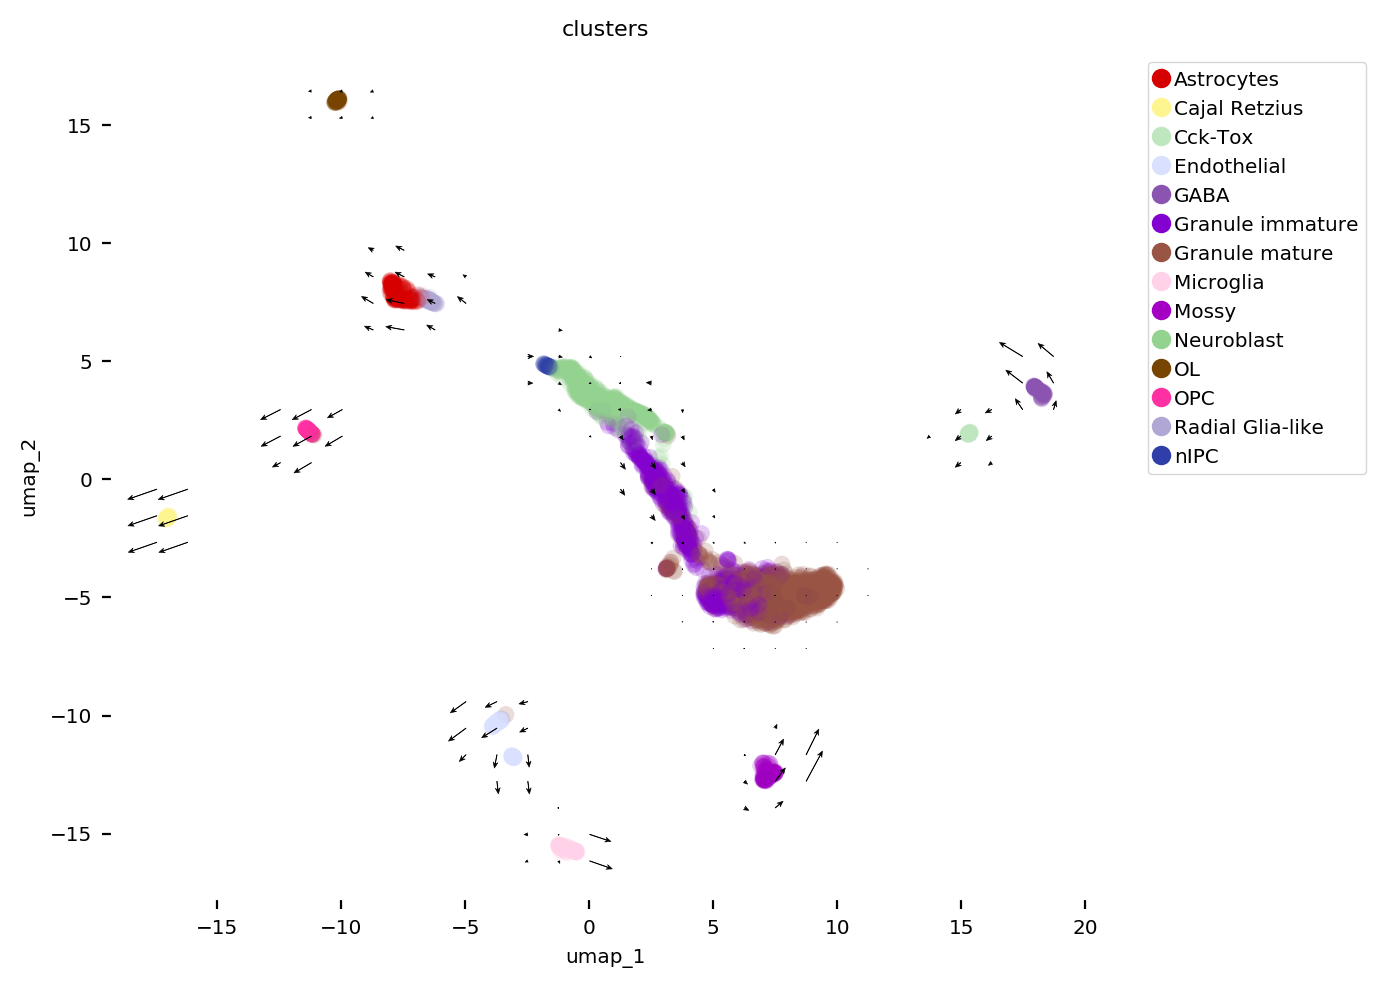

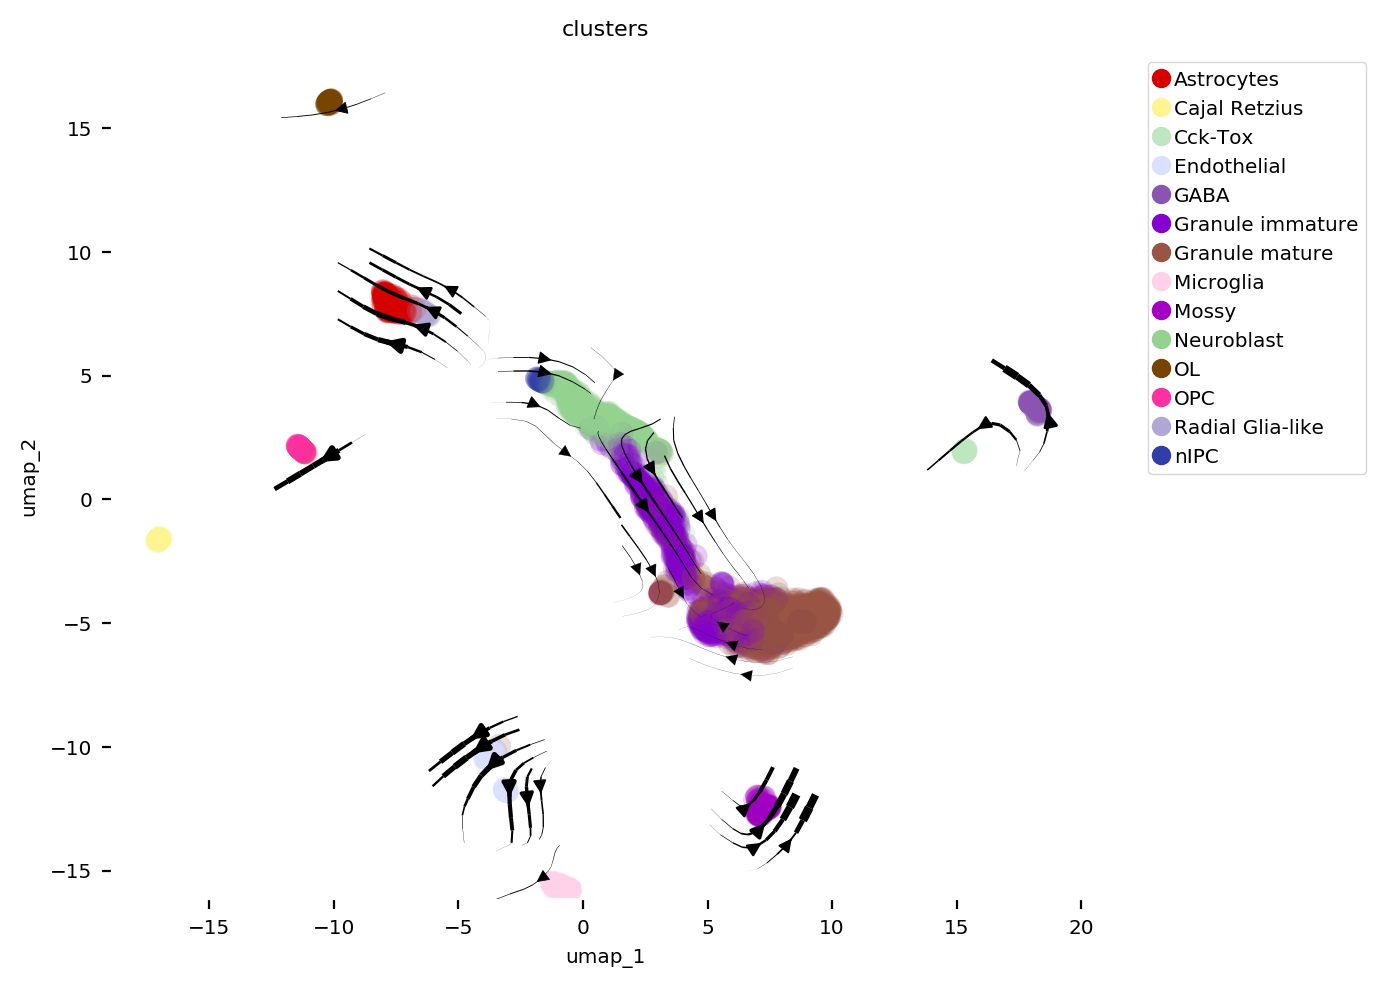

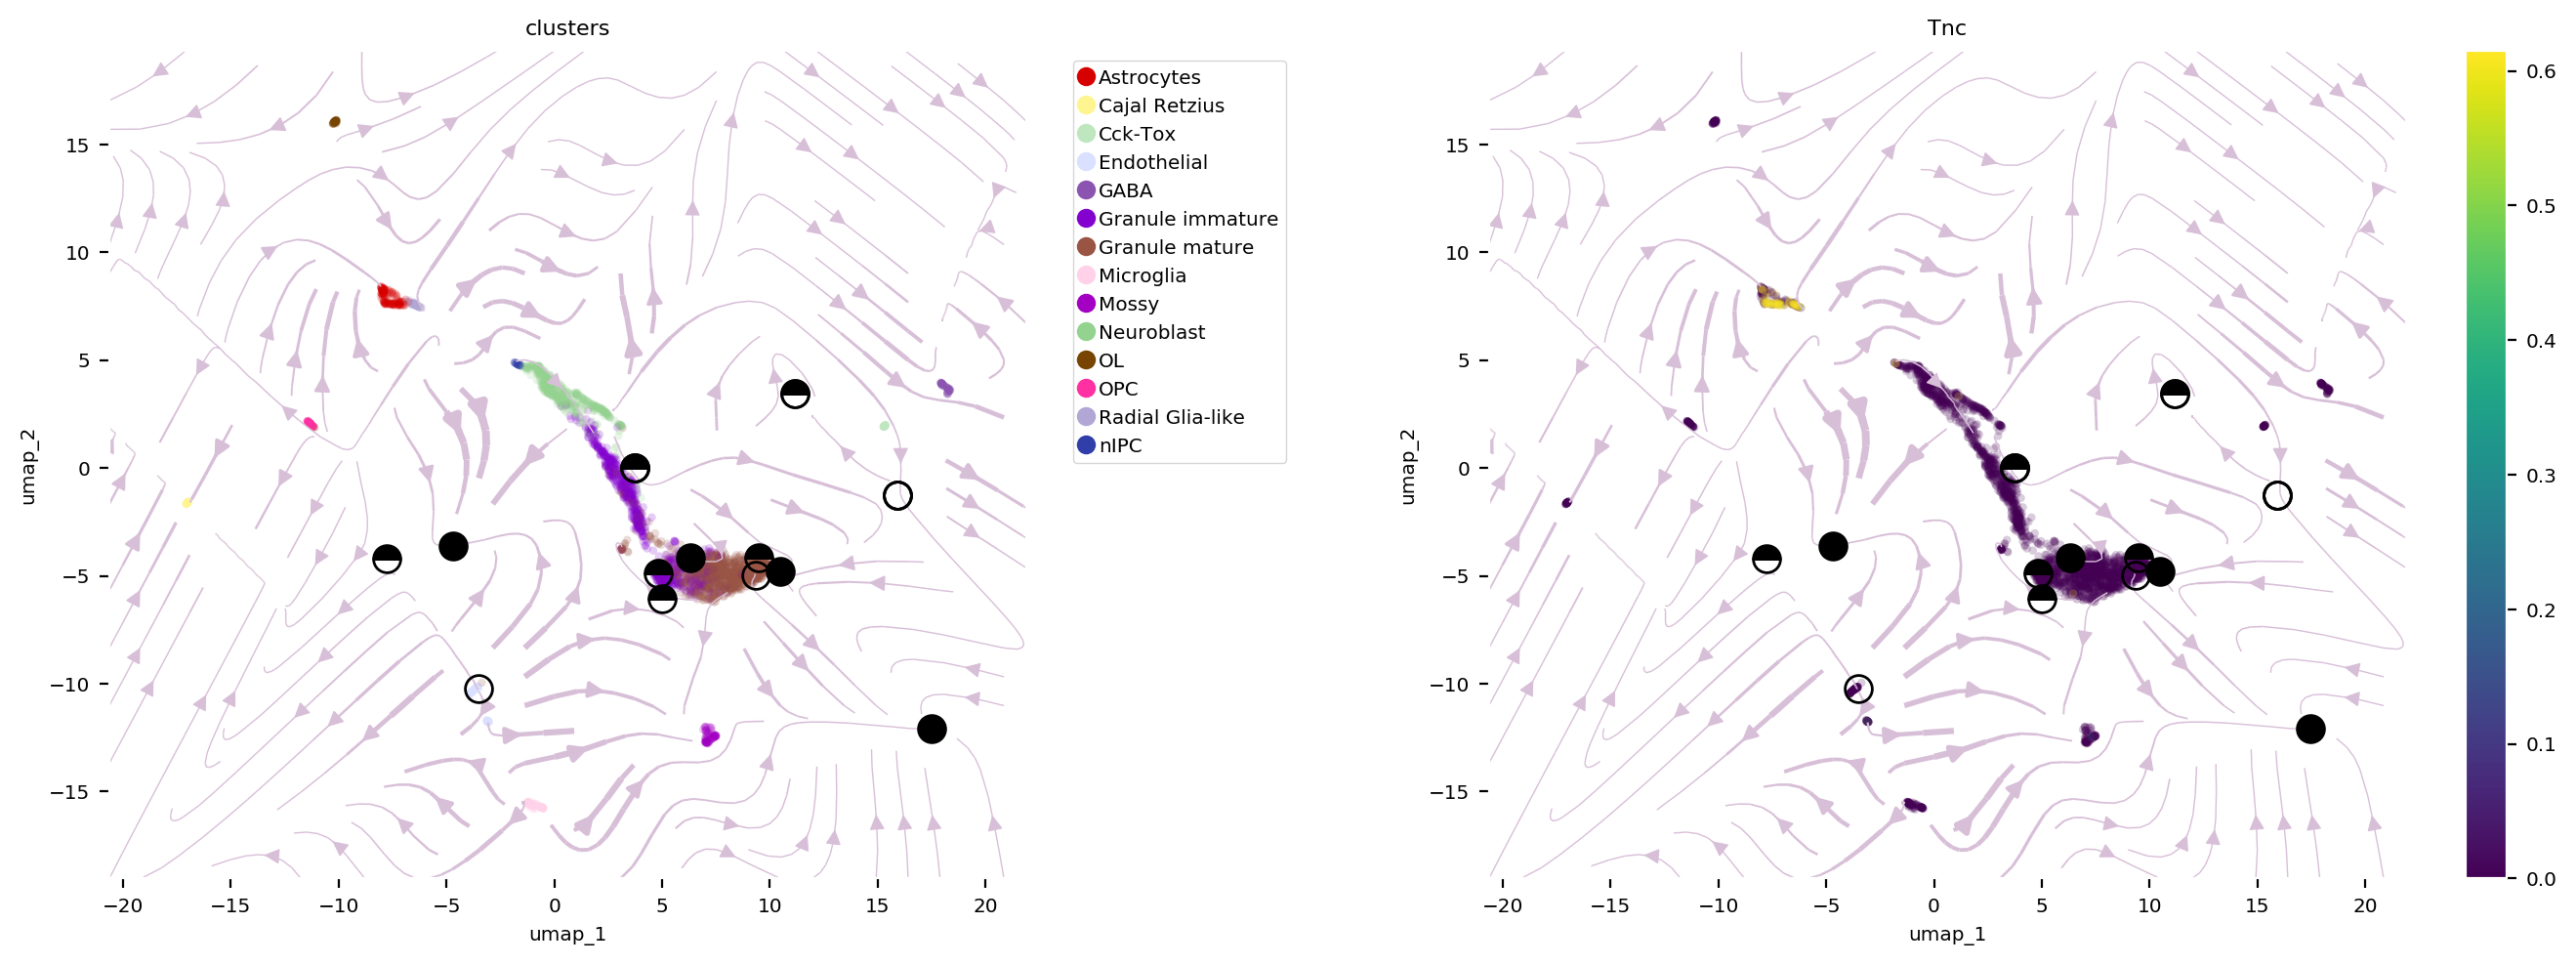

In [17]:

dyn.pl.phase_portraits(adata, genes=DentateGyrus_genes[:3], ncols=3, figsize=(3, 3), basis='umap', show_quiver=False)

dyn.pl.cell_wise_velocity(adata, color=['clusters'], quiver_size=1.2, quiver_length=1.2) # ['GRIA3', 'LINC00982', 'AFF2']

dyn.pl.grid_velocity(adata, color=['clusters'], method='gaussian')

dyn.pl.streamline_plot(adata, color=['clusters'], basis='umap', density=2) 

dyn.pl.topography(adata, color=['clusters', 'Tnc'], basis='umap', ncols=2)
